In [53]:
import pandas as pd
import datetime
import os

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
sns.set(color_codes=True)

# if matplotlib is not set inline, you will not see plots
%matplotlib inline 

In [55]:
targetdir = "./data/ShareOfVolume/"
filename = "share_of_volume.csv"

df = pd.read_csv(targetdir + filename)

In [56]:
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values(["date"])
df["shareOfVolume"] = df["shareOfVolume"]

In [57]:
df

,date,category,shareOfVolume
0,2017-11-23,Art,1.000000
1,2017-11-24,Art,1.000000
2,2017-11-25,Art,1.000000
3,2017-11-26,Art,1.000000
4,2017-11-27,Art,1.000000
...,...,...,...
6290,2021-04-27,Games,0.050570
6292,2021-04-27,Other,0.021010
6288,2021-04-27,Art,0.721452
6289,2021-04-27,Collectible,0.158946


In [58]:
pivoted_df = df.pivot(index='date', columns='category', values='shareOfVolume').fillna(0).reset_index()\
             .rolling(window="30D", on="date").mean()
pivoted_df

category,date,Art,Collectible,Games,Metaverse,Other,Utility
0,2017-11-23,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2017-11-24,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2017-11-25,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2017-11-26,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,2017-11-27,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
1247,2021-04-23,0.653041,0.138165,0.095537,0.080565,0.023925,0.008767
1248,2021-04-24,0.648422,0.140999,0.096495,0.081859,0.023486,0.008740
1249,2021-04-25,0.644003,0.143432,0.097328,0.083093,0.023330,0.008813
1250,2021-04-26,0.640089,0.147463,0.098496,0.081676,0.023331,0.008944


/var/folders/5j/4tfq0lqx0bvc0ywx8_h44jjm0000gn/T/ipykernel_5168/1737483063.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


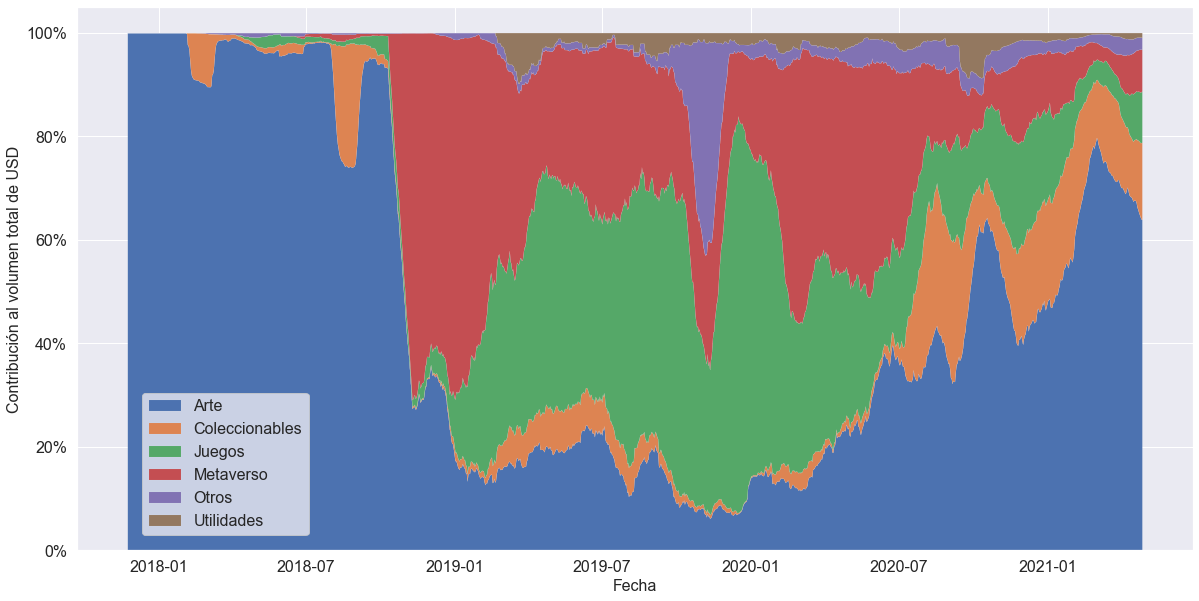

In [60]:
fig = plt.figure()

labels = ["Arte", "Coleccionables", "Juegos", "Metaverso", "Otros", "Utilidades"]

ax = plt.stackplot(pivoted_df['date'], 
                   pivoted_df["Art"], 
                   pivoted_df["Collectible"],
                   pivoted_df["Games"], 
                   pivoted_df["Metaverse"], 
                   pivoted_df["Other"],
                   pivoted_df["Utility"], labels=labels, lw=0.05)

plt.xlabel("Fecha", fontsize=16)
plt.ylabel("Contribución al volumen total de USD", fontsize=16)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
plt.legend(labels, bbox_to_anchor=(0.215,0.305), prop={'size': 16})
plt.rcParams["figure.figsize"] = (20,10)
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 

plt.savefig("./shareOfVolume/shareOfVolume_window.svg", bbox_inches='tight')

# No window

In [61]:
art_df = df[df["category"] == "Art"]
#art_df = art_df.rolling(window="30D", on="date").mean()
art_df.info()
art_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1252 entries, 0 to 6288
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1252 non-null   datetime64[ns]
 1   category       1252 non-null   object        
 2   shareOfVolume  1252 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 39.1+ KB


,date,category,shareOfVolume
0,2017-11-23,Art,1.000000
1,2017-11-24,Art,1.000000
2,2017-11-25,Art,1.000000
3,2017-11-26,Art,1.000000
4,2017-11-27,Art,1.000000
...,...,...,...
6264,2021-04-23,Art,0.629404
6270,2021-04-24,Art,0.617524
6276,2021-04-25,Art,0.587211
6282,2021-04-26,Art,0.582482


In [62]:
collectible_df = df[df["category"] == "Collectible"]
#collectible_df = collectible_df.rolling(window="30D", on="date").mean()
collectible_df.info()
collectible_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1097 entries, 74 to 6289
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1097 non-null   datetime64[ns]
 1   category       1097 non-null   object        
 2   shareOfVolume  1097 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 34.3+ KB


,date,category,shareOfVolume
74,2018-02-04,Collectible,0.058545
76,2018-02-05,Collectible,0.629706
78,2018-02-06,Collectible,0.066812
80,2018-02-07,Collectible,0.223804
82,2018-02-08,Collectible,0.625599
...,...,...,...
6265,2021-04-23,Collectible,0.199585
6271,2021-04-24,Collectible,0.199553
6277,2021-04-25,Collectible,0.189408
6283,2021-04-26,Collectible,0.239306


In [63]:
games_df = df[df["category"] == "Games"]
#games_df = games_df.rolling(window="30D", on="date").mean()
games_df

,date,category,shareOfVolume
151,2018-03-10,Games,0.000014
162,2018-03-15,Games,0.000157
199,2018-03-29,Games,0.000170
216,2018-04-05,Games,0.004483
219,2018-04-06,Games,0.012627
...,...,...,...
6266,2021-04-23,Games,0.069174
6272,2021-04-24,Games,0.071082
6278,2021-04-25,Games,0.086346
6284,2021-04-26,Games,0.084146


In [64]:
metaverse_df = df[df["category"] == "Metaverse"]
#metaverse_df = metaverse_df.rolling(window="30D", on="date").mean()
metaverse_df

,date,category,shareOfVolume
460,2018-06-12,Metaverse,0.010873
480,2018-06-18,Metaverse,0.004176
485,2018-06-19,Metaverse,0.023969
489,2018-06-20,Metaverse,0.030923
494,2018-06-21,Metaverse,0.007696
...,...,...,...
6267,2021-04-23,Metaverse,0.076295
6273,2021-04-24,Metaverse,0.086697
6279,2021-04-25,Metaverse,0.095805
6285,2021-04-26,Metaverse,0.055461


In [65]:
other_df = df[df["category"] == "Other"]
#other_df = other_df.rolling(window="30D", on="date").mean()
other_df

,date,category,shareOfVolume
98,2018-02-16,Other,0.004542
100,2018-02-17,Other,0.001213
103,2018-02-18,Other,0.001366
105,2018-02-19,Other,0.000081
110,2018-02-21,Other,0.007726
...,...,...,...
6268,2021-04-23,Other,0.017642
6274,2021-04-24,Other,0.020997
6280,2021-04-25,Other,0.035183
6286,2021-04-26,Other,0.031279


In [66]:
utility_df = df[df["category"] == "Utility"]
#utility_df = utility_df.rolling(window="30D", on="date").mean()
utility_df

,date,category,shareOfVolume
1573,2019-02-11,Utility,0.001311
1619,2019-02-20,Utility,0.188927
1630,2019-02-22,Utility,0.383303
1636,2019-02-23,Utility,0.002221
1642,2019-02-24,Utility,0.001796
...,...,...,...
6269,2021-04-23,Utility,0.007901
6275,2021-04-24,Utility,0.004147
6281,2021-04-25,Utility,0.006046
6287,2021-04-26,Utility,0.007326


In [67]:
all_df = art_df.set_index('date')\
    .join(other=collectible_df.set_index('date'), on=["date"], 
          how='outer', sort=True, lsuffix='_art', rsuffix='_collectible') \
    .join(other=games_df.set_index('date'), on=["date"], 
          how='outer', sort=True) \
    .join(other=metaverse_df.set_index('date'), on=["date"], 
          how='outer', sort=True, lsuffix='_games', rsuffix='_metaverse') \
    .join(other=other_df.set_index('date'), on=["date"], 
          how='outer', sort=True) \
    .join(other=utility_df.set_index('date'), on=["date"], 
          how='outer', sort=True, lsuffix='_other', rsuffix='_utility').reset_index()

all_df.fillna(0, inplace=True)

all_df

,date,category_art,shareOfVolume_art,category_collectible,shareOfVolume_collectible,category_games,shareOfVolume_games,category_metaverse,shareOfVolume_metaverse,category_other,shareOfVolume_other,category_utility,shareOfVolume_utility
0,2017-11-23,Art,1.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000
1,2017-11-24,Art,1.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000
2,2017-11-25,Art,1.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000
3,2017-11-26,Art,1.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000
4,2017-11-27,Art,1.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,2021-04-23,Art,0.629404,Collectible,0.199585,Games,0.069174,Metaverse,0.076295,Other,0.017642,Utility,0.007901
1248,2021-04-24,Art,0.617524,Collectible,0.199553,Games,0.071082,Metaverse,0.086697,Other,0.020997,Utility,0.004147
1249,2021-04-25,Art,0.587211,Collectible,0.189408,Games,0.086346,Metaverse,0.095805,Other,0.035183,Utility,0.006046
1250,2021-04-26,Art,0.582482,Collectible,0.239306,Games,0.084146,Metaverse,0.055461,Other,0.031279,Utility,0.007326


/var/folders/5j/4tfq0lqx0bvc0ywx8_h44jjm0000gn/T/ipykernel_5168/1626033995.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


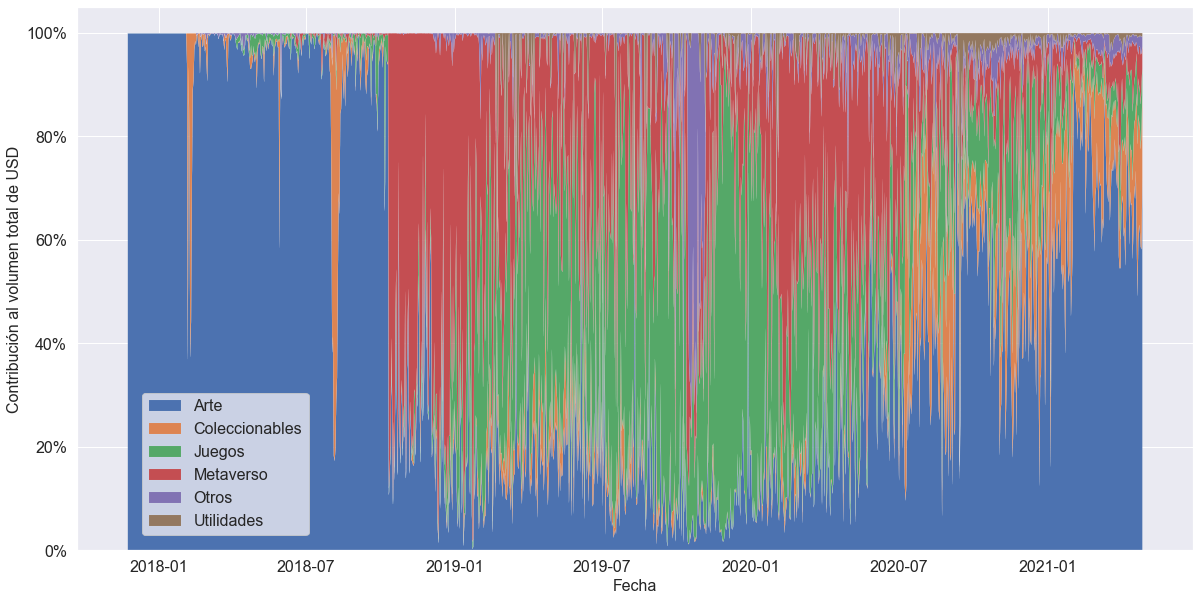

In [68]:
fig = plt.figure()

labels = ["Arte", "Coleccionables", "Juegos", "Metaverso", "Otros", "Utilidades"]

ax = plt.stackplot(all_df['date'], all_df["shareOfVolume_art"], all_df["shareOfVolume_collectible"],
              all_df["shareOfVolume_games"], all_df["shareOfVolume_metaverse"], all_df["shareOfVolume_other"],
              all_df["shareOfVolume_utility"], labels=labels, lw=0.05)

plt.xlabel("Fecha", fontsize=16)
plt.ylabel("Contribución al volumen total de USD", fontsize=16)
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()]) 
plt.legend(labels, bbox_to_anchor=(0.215,0.305), prop={'size': 16})
plt.rcParams["figure.figsize"] = (20,10)
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 


plt.savefig("./shareOfVolume/shareOfVolume_no_window.svg", bbox_inches='tight')

plt.show()